In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, datasets, sample, audio, utils, viz

In [7]:
p, n_examples, n_samples = model.HParams(n_chans=128, n_layers=8, dilation_stacks=2), 2**13, 4
X = datasets.stereo_impulse_at_t0(n_examples, n_samples, p, probs=(0.3, 0.7))
m = model.Wavenet(p)
animation = viz.LearningAnimation(n_samples)
t = train.Trainer(m, X, None, train.HParams(max_epochs=1), animation)

In [8]:
os.environ['WANDB_MODE'] = 'dryrun'

In [9]:
t.train()
animation.render('training.gif')

train loss,1.77002
_step,127
_runtime,56
_timestamp,1605688900


train loss,█████▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇██
_timestamp,▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇██


wandb: You can sync this run to the cloud by running:
wandb: wandb sync wandb/offline-run-20201118_214043-3h4tnm8u
wandb: Offline run mode, not syncing to the cloud.
wandb: W&B is disabled in this directory.  Run `wandb on` to enable cloud syncing.
1:127 loss 0.87288 lr 3.000000e-04: 100%|██████████| 128/128 [02:12<00:00,  1.04s/it]


<Figure size 2592x576 with 0 Axes>

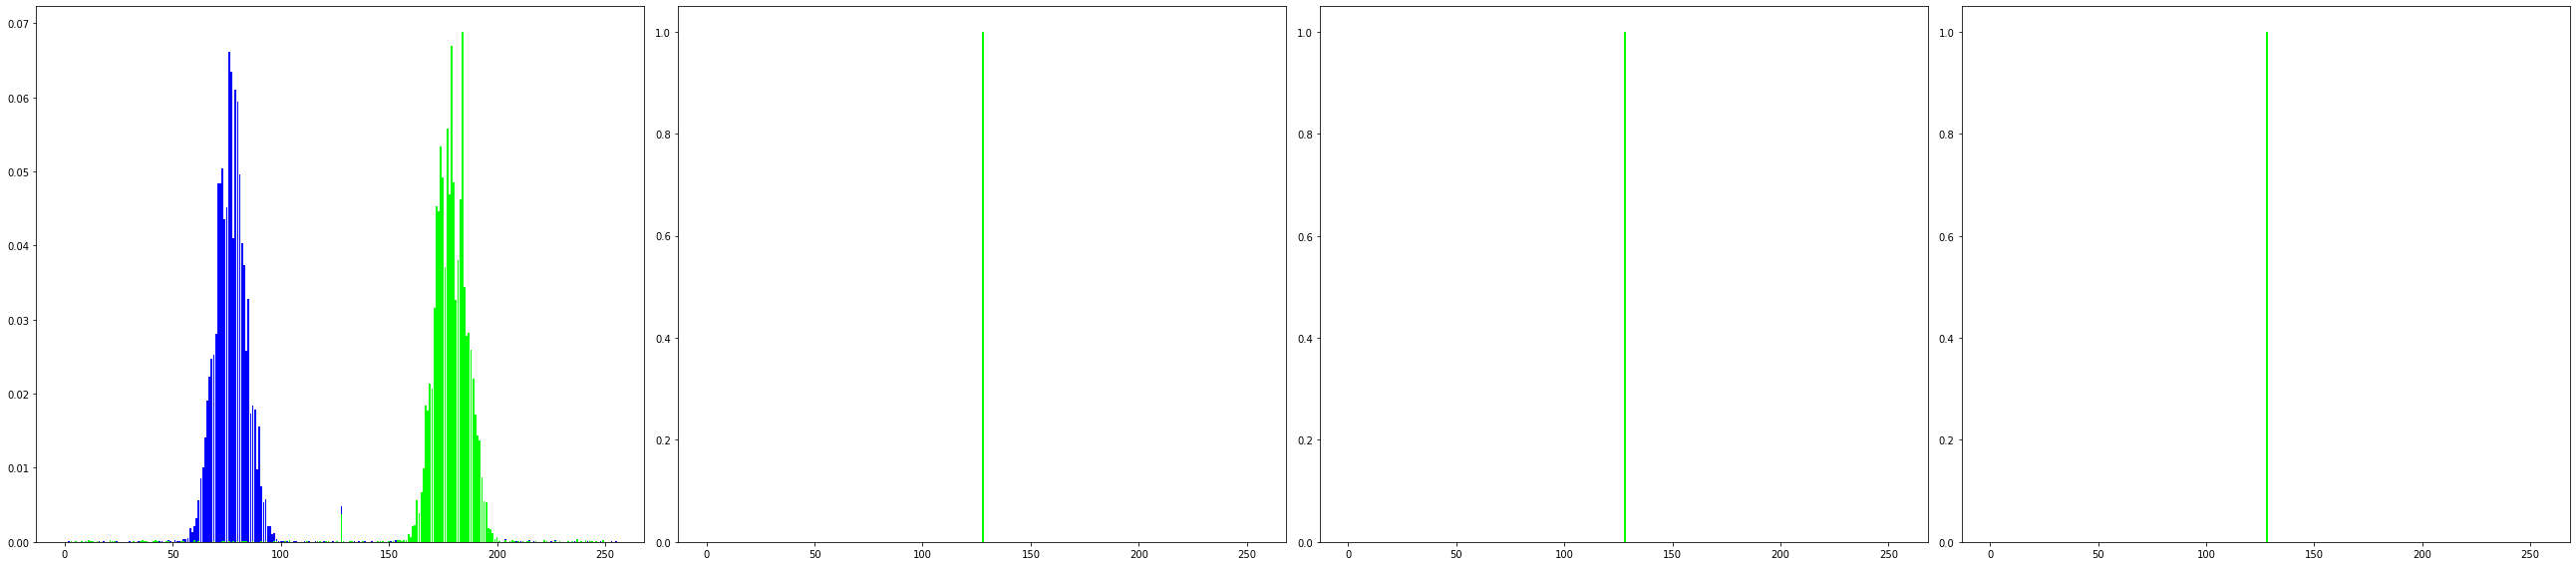

In [10]:
logits, _ = m.forward(X[:10])
plt.clf()
viz.plot_stereo_sample_distributions(logits, 0)
plt.show()